In [1]:
from blitz_env.simulate_draft_sqlite import init_database
init_database(2024)

### Datasette

Datasette is a sqlite visual explorer.  `make launch-simulator` should have already kicked off an instance running at [http://127.0.0.1:8001/](http://127.0.0.1:8001/).  

If not, you can run an instance from terminal with `datasette draft.db`

## Pandas

Here is some helper code for exploring the data with pandas

In [2]:
from blitz_env.models import DatabaseManager
import pandas as pd

db = DatabaseManager()
df = pd.read_sql("SELECT * FROM players", db.engine)
df

,id,full_name,professional_team,player_bye_week,rank,tier,position_rank,position_tier,gsis_id,allowed_positions,availability,pick_chosen,current_bot_id
0,16393,Christian McCaffrey,SF,9,1,1,1,1,00-0033280,"[""RB""]",AVAILABLE,None,None
1,19202,CeeDee Lamb,DAL,7,2,1,1,1,00-0036358,"[""WR""]",AVAILABLE,None,None
2,15802,Tyreek Hill,MIA,6,3,1,2,1,00-0033040,"[""WR""]",AVAILABLE,None,None
3,19799,Amon-Ra St. Brown,DET,5,4,1,3,1,00-0036963,"[""WR""]",AVAILABLE,None,None
4,19788,Ja'Marr Chase,CIN,12,5,1,4,1,00-0036900,"[""WR""]",AVAILABLE,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,18787,Penny Hart,FA,0,719,16,294,15,00-0035022,"[""WR""]",AVAILABLE,None,None
719,18984,D.J. Montgomery,IND,14,720,16,247,13,00-0035045,"[""WR""]",AVAILABLE,None,None
720,19359,James Proche II,CLE,10,721,16,286,15,00-0036133,"[""WR""]",AVAILABLE,None,None
721,22800,Dax Milne,FA,0,722,16,295,15,00-0036671,"[""WR""]",AVAILABLE,None,None


## Example Draft

In [3]:
from blitz_env.simulate_draft_sqlite import simulate_draft, visualize_draft_board
from blitz_env.models import DatabaseManager, Player

def draft_player() -> str:
    db = DatabaseManager()
    try:
        # First, try to get the best available QB
        best_qb = db.session.query(Player).filter(
            Player.availability == 'AVAILABLE',
            Player.allowed_positions.contains("QB"),
        ).order_by(Player.rank).first()
        
        if best_qb:
            return best_qb.id
        
        # If no QBs available, get best overall player
        best_player = db.session.query(Player).filter(
            Player.availability == 'AVAILABLE'
        ).order_by(Player.rank).first()
        
        return best_player.id if best_player else ""
    finally:
        db.close()

# Run the draft simulation - data is stored in SQLite database
season = 2025
simulate_draft(draft_player, season)

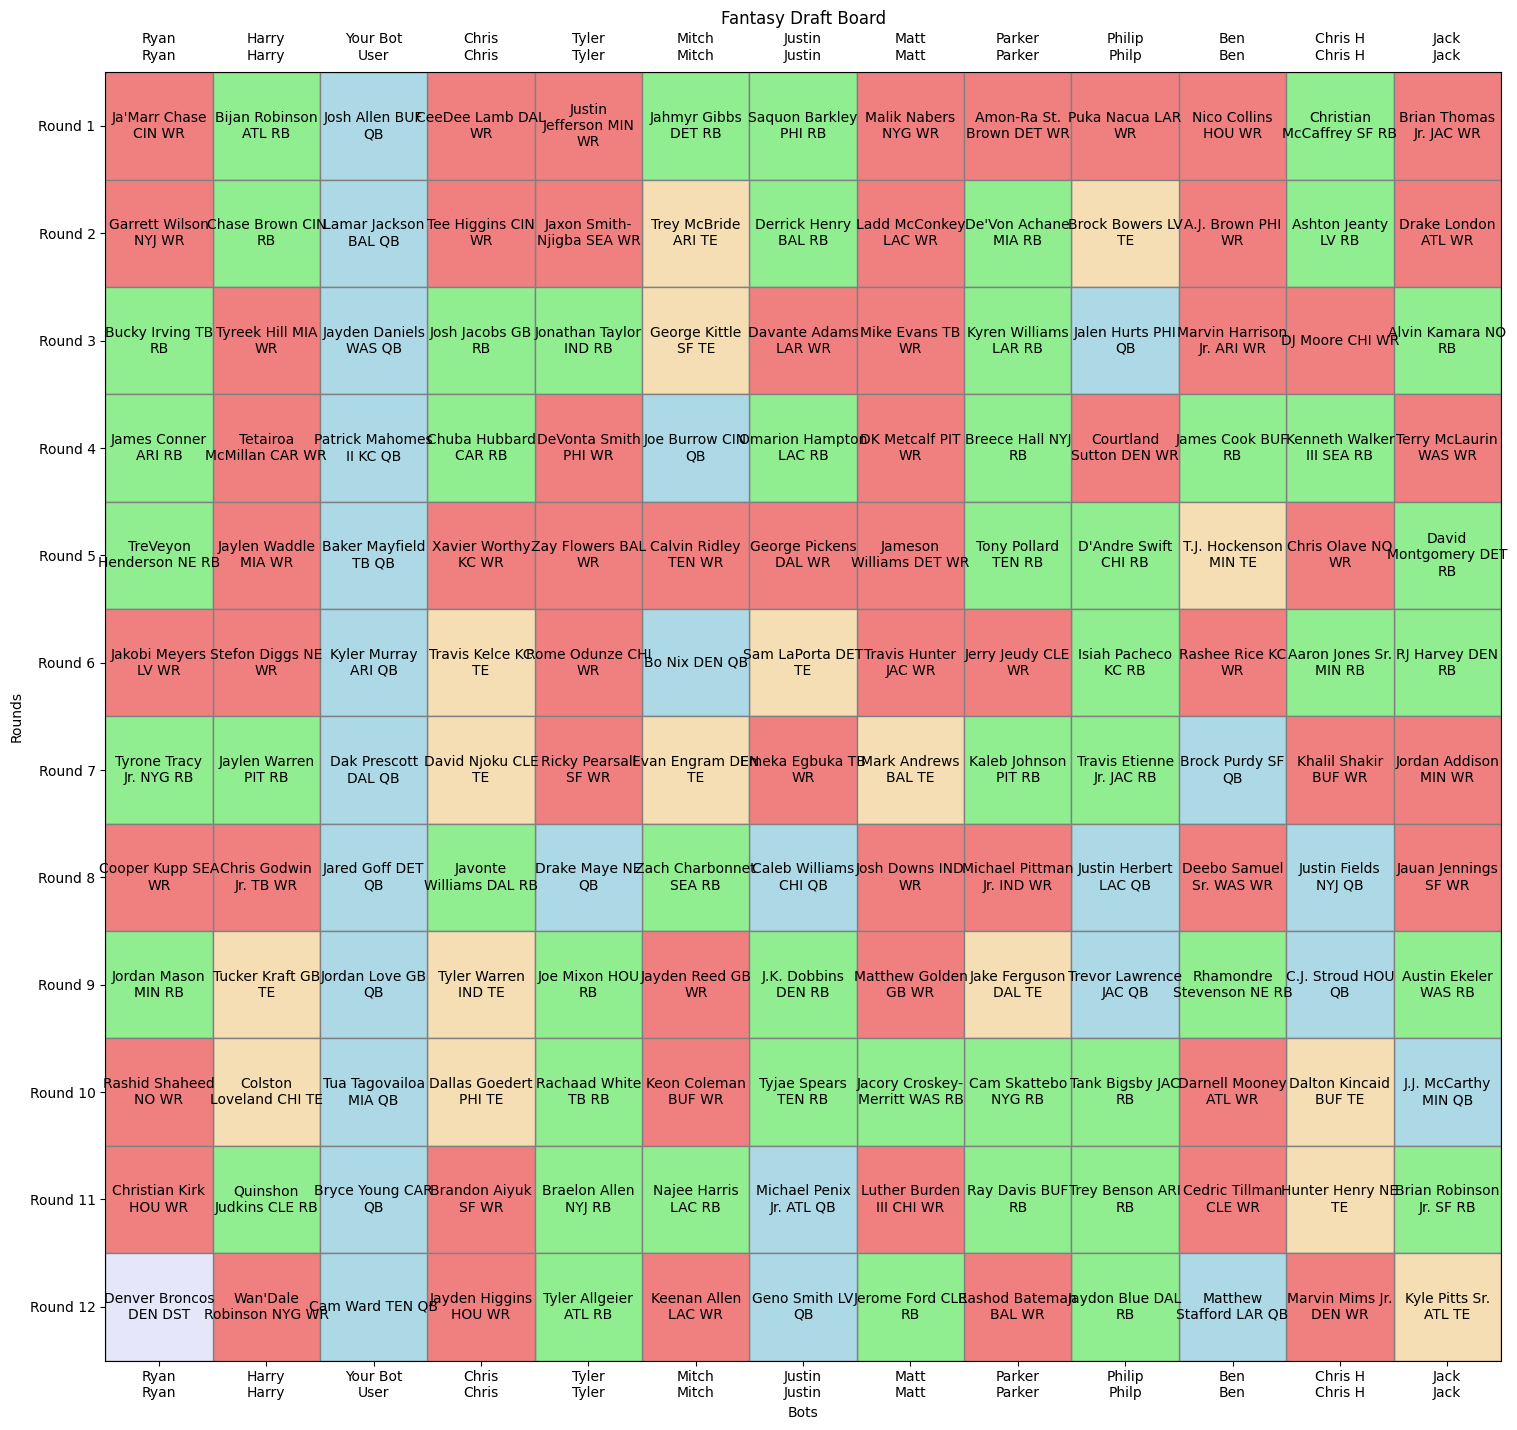

In [4]:
visualize_draft_board()

In [5]:
from blitz_env.score_game_sqlite import score_draft_for_visualization

if season < 2025:
    score_draft_for_visualization()